# Ansatz circuits
In this notebook functions for generating different ansatz circuits are shown and an example is shown

In [3]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter, ParameterVector
import math


def encodeValidation(n,dataLenght, reps):
    """
    Function for checking that the number of parameters times "reps"
    matches the size of the ansatz circuit 
    """
    if (dataLenght % n) > 0 and (dataLenght / n) > reps:
         raise Exception("nr of features and encoding circuit doesn't match") 
    else:
        pass

    
def qcAnsatz2(qubits, nrT):
    """"
    This function generates ansatz circuit number 2
    Inputs are number of qubits and the number of parameters
    
    :param int qubits: The number of qubits in the circuit
    :param int nrT: The number of optimisation parameters which should be generated
    :return: Ansatz circuit
    """
    
    paraPrQ = 2
    paraPrL = paraPrQ * qubits
    reps = math.ceil(nrT/paraPrL)
    encodeValidation(qubits, nrT, reps) #checks wether or not nrT and qubits match
    
    theta_list = ParameterVector('θ', length=reps*paraPrL)
    circuit = QuantumCircuit(qubits)
    for j in range(reps):
        for i in range(qubits):
            circuit.rx(theta_list[j*paraPrL+i],i)
            circuit.ry(theta_list[j*paraPrL+i+qubits],i)
        
        for i in range((qubits-1),0,-1):
            circuit.cx(i,i-1)
            
    return circuit
    
    
    
def qcAnsatz9(qubits, nrT):
    """"
    This function generates ansatz circuit number 9
    Inputs are number of qubits and the number of parameters
    
    :param int qubits: The number of qubits in the circuit
    :param int nrT: The number of optimisation parameters which should be generated
    :return: Ansatz circuit
    """
    
    paraPrQ = 1
    paraPrL = paraPrQ * qubits
    reps = math.ceil(nrT/paraPrL)
    
    encodeValidation(qubits, nrT, reps) #checks wether or not nrT and qubits match
    
    theta_list = ParameterVector('θ', length=reps*qubits)
    circuit = QuantumCircuit(qubits)

    for j in range(reps):
        circuit.h(range(qubits))
        for i in range(qubits-1):
            circuit.swap(i,i+1)
        
        for i in range(qubits):
            circuit.rx(theta_list[j*qubits+i], i)

    return circuit


def qcAnsatz14(qubits, nrT):
    
    """
    This function generates ansatz circuit number 14
    Inputs are number of qubits and the number of parameters
    
    :param int qubits: The number of qubits in the circuit
    :param int nrT: The number of optimisation parameters which should be generated
    :return: Ansatz circuit
    """
    
    paraPrQ = 4
    paraPrL = paraPrQ * qubits
    reps = math.ceil(nrT/paraPrL)
    
    encodeValidation(qubits, nrT, reps) #checks wether or not nrT and qubits match
    
    theta_list = ParameterVector('θ', length=reps*paraPrL)
    circuit = QuantumCircuit(qubits)
    counter = 0
    for j in range(reps):
        for i in range(qubits):
            circuit.ry(theta_list[counter], i)
            counter += 1

        circuit.crx(theta_list[counter], qubits-1, 0)
        counter += 1
       
        if qubits > 2:
            for i in range((qubits-2),-1,-1):
                circuit.crx(theta_list[counter],i,i+1)
                counter += 1

        for i in range(qubits):
            circuit.ry(theta_list[counter], i)
            counter += 1

        circuit.crx(theta_list[counter], qubits-1, qubits-2)
        counter += 1
        circuit.crx(theta_list[counter], 0, qubits-1,)
        counter += 1
        if qubits > 2:
            for i in range(1,(qubits-1)):
                circuit.crx(theta_list[counter], i, i-1,)
                counter += 1        
    return circuit
    

Example of use:
Ansatz 9 with 4 qubits and 8 parameters resulting in 2 layers

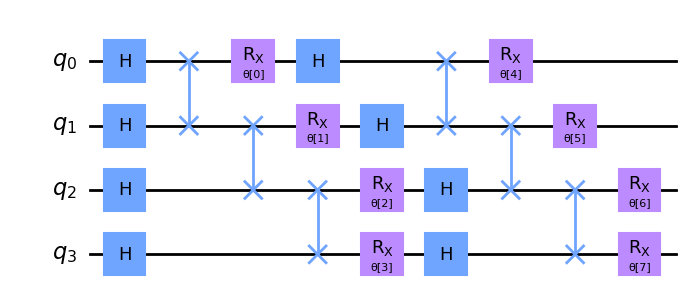

In [4]:
testCircuit = qcAnsatz9(4,8) 
testCircuit.draw('mpl')